This file is about reducing columns, feature engineerings, and making numeric colums (dummy) for using machine leaning models

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#from 0_root.ipynb
%store -r df

In [3]:
df2 = df.copy()
df2.head(2).T

,0,1
ID,10224738,10224739
Case Number,HY411648,HY411615
Date,09/05/2015 01:30:00 PM,09/04/2015 11:30:00 AM
Block,043XX S WOOD ST,008XX N CENTRAL AVE
IUCR,0486,0870
Primary Type,BATTERY,THEFT
Description,DOMESTIC BATTERY SIMPLE,POCKET-PICKING
Location Description,RESIDENCE,CTA BUS
Arrest,False,False
Domestic,True,False


Before drom columns, let's look at correlation for columns (only numeric)

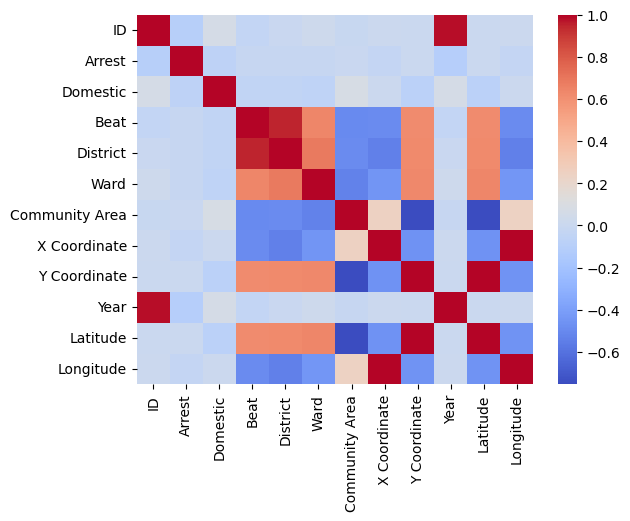

In [4]:
#show a heat map
sns.heatmap(df2.corr(numeric_only = True), cmap='coolwarm')
plt.show()

ID and Year, X Coordinate and Longitude, Y Coordinate and Latitude, Latitude and Community Area, Y Coordinate and Community Area, Beat and District are strongly correlating. ID can be dropped because identifying individuals is not important in this analysis. like it's descussed in the notebook, root.ipnb, X and Y coordinates are the same information as Latitude and Longitude, which is about location. Also, there is no plan to map by using location information here, so these four columns will be dropped.

For the categorical columns, Case number is similar as ID, which will be dropped. The column, Updated on is just information about when the data is updated; there is no need information. Location includes Latitude and Longitude. Since these columns will be dropped, Location will also be dropped. Block will probably be dropped because it shows location as well

In [5]:
#drop columns
df2.drop(columns=['ID', 'Case Number', 'Block', 'Primary Type', 'Description', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'], inplace=True)
#check
df2.head(2)

#confirmed

,Date,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code
0,09/05/2015 01:30:00 PM,0486,RESIDENCE,False,True,924,9.0,12.0,61.0,08B
1,09/04/2015 11:30:00 AM,0870,CTA BUS,False,False,1511,15.0,29.0,25.0,06


#### reduce values in `IUCR`

The FBI code refers 'IUCR' and crasifies it into a few groups, such as Crimes Against Persons, Crimes Against Property, or Crimes Aginst Society (Or Persons or Society): *1. To reduce the variety of the values for the target, make a new column about the groups as a target and delete 'IUCR' column and 'FBI Code' column.

Crimes Against Persons or Society will be either Crimes Against Persons or Crimes Against Society.
- Criminal Sexual Abuse: Crimes Against Persons or Society --> Crimes Against Society because the other one take Person. Also, it looks like more about society. It's just a feeling, not further meanings
- Offenses Against Family: Crimes Against Persons or Society --> Crimes Against Persons because more about children

*1 https://gis.chicagopolice.org/pages/crime_details

A csv file (CrimesAgainst.csv) is created by using the information from the website cited the above to add the information to the dataframe \<df2>

In [6]:
#read a file
fbi_code = pd.read_csv('data/CrimesAgainst.csv')
#show it
fbi_code.head()

,FBI Code,Crimes Against
0,01A,Persons
1,01B,Persons
2,2,Persons
3,3,Property
4,04A,Persons


In [7]:
#merges two tables
df2 = df2.merge(fbi_code, how='inner')
#check
df2.head(5)

#check again with differnt rows

,Date,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Crimes Against
0,09/05/2015 01:30:00 PM,0486,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,Persons
1,09/05/2015 11:00:00 AM,0460,SMALL RETAIL STORE,False,False,1623,16.0,45.0,11.0,08B,Persons
2,09/05/2015 12:50:00 PM,0486,STREET,False,True,222,2.0,4.0,39.0,08B,Persons
3,09/05/2015 12:35:00 PM,0486,STREET,False,True,1633,16.0,38.0,15.0,08B,Persons
4,09/05/2015 06:20:00 AM,0486,APARTMENT,False,True,421,4.0,7.0,43.0,08B,Persons


In [8]:
#check
df2.tail(5)

#looks good

,Date,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Crimes Against
5019573,09/17/2022 12:58:00 AM,0110,STREET,True,False,1411,14.0,33.0,21.0,01A,Persons
5019574,09/17/2022 10:47:00 PM,0110,STREET,False,False,522,5.0,34.0,49.0,01A,Persons
5019575,09/27/2022 10:51:00 PM,0110,RIVER BANK,True,True,1834,18.0,42.0,8.0,01A,Persons
5019576,09/27/2022 10:44:00 PM,0110,AUTO,False,False,235,2.0,5.0,41.0,01A,Persons
5019577,09/27/2022 10:44:00 PM,0110,AUTO,False,False,211,2.0,4.0,35.0,01A,Persons


In [9]:
#deletes 'IUCR' and 'FBI Code'
df2.drop(columns=['IUCR', 'FBI Code'], inplace=True)
df2.head(2)

#deleted

,Date,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Crimes Against
0,09/05/2015 01:30:00 PM,RESIDENCE,False,True,924,9.0,12.0,61.0,Persons
1,09/05/2015 11:00:00 AM,SMALL RETAIL STORE,False,False,1623,16.0,45.0,11.0,Persons


#### delete null values

In [10]:
#checks null values and deletes these rows
df2.isna().sum()/df2.shape[0]*100

Date                    0.000000
Location Description    0.196809
Arrest                  0.000000
Domestic                0.000000
Beat                    0.000000
District                0.000000
Ward                    7.964614
Community Area          7.952501
Crimes Against          0.000000
dtype: float64

In [11]:
#like it's descussed in the notebook, root.ipnb:
#because 'Location Description' is difficult to guess, and it is only 0.19%,
#because it takes time to fill in all 'Ward' and 'Community Area', though, about 8% is a little high,
#just delete all rows with null values

#deletes rows
df2.dropna(inplace=True)
df2.isna().sum()/df2.shape[0]*100

#deleted

Date                    0.0
Location Description    0.0
Arrest                  0.0
Domestic                0.0
Beat                    0.0
District                0.0
Ward                    0.0
Community Area          0.0
Crimes Against          0.0
dtype: float64

In [12]:
#checks the shape
df2.shape

#4609145 rows and 8 columns

(4609145, 9)

#### convert `Arrest` and `Domestic` to binary columns

In [13]:
df2.head(2)

,Date,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Crimes Against
0,09/05/2015 01:30:00 PM,RESIDENCE,False,True,924,9.0,12.0,61.0,Persons
1,09/05/2015 11:00:00 AM,SMALL RETAIL STORE,False,False,1623,16.0,45.0,11.0,Persons


In [14]:
#change boolean as strings to numeric
df2['Arrest'] = np.where(df2['Arrest']==False, 0, 1)
df2['Domestic'] = np.where(df2['Domestic']==False, 0, 1)
df2.head(2)

#confirm the changes

,Date,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Crimes Against
0,09/05/2015 01:30:00 PM,RESIDENCE,0,1,924,9.0,12.0,61.0,Persons
1,09/05/2015 11:00:00 AM,SMALL RETAIL STORE,0,0,1623,16.0,45.0,11.0,Persons


#### change the type of `Date` to a date type

In [15]:
#changes 'Date' to a date type
df2['Date'] = pd.to_datetime(df2['Date'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4609145 entries, 0 to 5019577
Data columns (total 9 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Date                  datetime64[ns]
 1   Location Description  object        
 2   Arrest                int32         
 3   Domestic              int32         
 4   Beat                  int64         
 5   District              float64       
 6   Ward                  float64       
 7   Community Area        float64       
 8   Crimes Against        object        
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(2)
memory usage: 316.5+ MB


#### get the total number of police beats in each district

The number of crimes might be changed depending on a number of plice; more police in a aria get/find more crimes. The column 'Beat' is a smallest area that a group of police officers patorols. If it's calculated how many beats are in each district, the results kind of reflect the number of police is in the district.

In [16]:
#make a new dataframe
beat = pd.DataFrame(df2['Beat'])
beat.head(2)

#created

,Beat
0,924
1,1623


In [17]:
#extract numbers into new columns
beat['District'], beat['section_no'], beat['beat_no'] = beat['Beat'].astype('str').str.replace(r'(\w)(\w)$', "").astype('int'), beat['Beat'].astype('str').str[-2].astype('int'), beat['Beat']%10
beat.head(2)

C:\Users\robso\AppData\Local\Temp\ipykernel_1848\408745330.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  beat['District'], beat['section_no'], beat['beat_no'] = beat['Beat'].astype('str').str.replace(r'(\w)(\w)$', "").astype('int'), beat['Beat'].astype('str').str[-2].astype('int'), beat['Beat']%10


,Beat,District,section_no,beat_no
0,924,9,2,4
1,1623,16,2,3


In [18]:
#sanitary check --> expecting nothing
beat[beat['District']*100 + beat['section_no']*10 + beat['beat_no'] != beat['Beat']]

#nothing. good

,Beat,District,section_no,beat_no


In [19]:
#get the total number of beats(police beats) in each district
beatNo_list = beat.groupby(['District','section_no']).max().groupby('District').sum().drop(columns='Beat')
print("the total number of beats: ", beatNo_list['beat_no'].sum())
beatNo_list

the total number of beats:  312


,beat_no
District,
1,12
2,15
3,12
4,12
5,10
6,12
7,16
8,15
9,15


"Under CAPS, a team of 8 to 9 beat officers is assigned to each of the City’s 277 police beats. Beat officers patrol the same beat on the same watch for at least a year."
https://home.chicagopolice.org/community-policing-group/how-caps-works/beat-officers/#:~:text=Under%20CAPS%2C%20a%20team%20of,for%20at%20least%20a%20year.

The number does not much: 312 or 277. It might be because the number of police beats might have been changed over time; the dataset is from 2001. Also, the 312 might not be from all beats if the dataset misses some beat areas, unlikely though.

In [20]:
#reset the index because the destrict numbers are used as an index 
beatNo_list.reset_index(inplace=True)
beatNo_list.head(2)

#checked

,District,beat_no
0,1,12
1,2,15


In [21]:
#shows <df2> again
df2.head(2)

,Date,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Crimes Against
0,2015-09-05 13:30:00,RESIDENCE,0,1,924,9.0,12.0,61.0,Persons
1,2015-09-05 11:00:00,SMALL RETAIL STORE,0,0,1623,16.0,45.0,11.0,Persons


In [22]:
#merges two tables
df2 = df2.merge(beatNo_list, how='inner')
#check
df2.head(5)

#check again with differnt rows

,Date,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Crimes Against,beat_no
0,2015-09-05 13:30:00,RESIDENCE,0,1,924,9.0,12.0,61.0,Persons,15
1,2015-09-02 02:00:00,APARTMENT,0,1,935,9.0,3.0,61.0,Persons,15
2,2015-09-05 20:20:00,RESIDENCE,1,1,915,9.0,11.0,60.0,Persons,15
3,2015-09-05 20:00:00,ALLEY,0,1,911,9.0,12.0,58.0,Persons,15
4,2021-12-19 07:23:00,SIDEWALK,1,1,921,9.0,15.0,58.0,Persons,15


In [23]:
#check
df2.tail(5)

#looks good

,Date,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Crimes Against,beat_no
4608990,2023-02-09 00:35:00,STREET,1,0,2023,20.0,48.0,77.0,Persons,10
4608991,2004-08-01 20:05:00,VEHICLE NON-COMMERCIAL,1,1,2112,21.0,3.0,35.0,Persons,10
4608992,2004-07-04 15:45:48,STREET,1,0,2112,21.0,3.0,35.0,Society,10
4608993,2004-02-18 18:15:00,SIDEWALK,0,0,2112,21.0,3.0,35.0,Persons,10
4608994,2008-10-29 13:50:56,SIDEWALK,1,0,1323,13.0,27.0,24.0,Persons,10


In [24]:
#delete 'District'
df2.drop(columns='District', inplace=True)
df2.head(2)

#deleted

,Date,Location Description,Arrest,Domestic,Beat,Ward,Community Area,Crimes Against,beat_no
0,2015-09-05 13:30:00,RESIDENCE,0,1,924,12.0,61.0,Persons,15
1,2015-09-02 02:00:00,APARTMENT,0,1,935,3.0,61.0,Persons,15


In [25]:
#make dammies
df2_dammy = df2.copy()
df2_dammy = pd.get_dummies(df2_dammy, columns=['Location Description', 'Beat', 'Ward', 'Community Area'], drop_first=True)
df2_dammy.head(3)

#https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
#https://stackoverflow.com/questions/40336502/want-to-know-the-diff-among-pd-factorize-pd-get-dummies-sklearn-preprocessing

,Date,Arrest,Domestic,Crimes Against,beat_no,Location Description_AIRCRAFT,Location Description_AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,Location Description_AIRPORT BUILDING NON-TERMINAL - SECURE AREA,Location Description_AIRPORT EXTERIOR - NON-SECURE AREA,Location Description_AIRPORT EXTERIOR - SECURE AREA,...,Community Area_68.0,Community Area_69.0,Community Area_70.0,Community Area_71.0,Community Area_72.0,Community Area_73.0,Community Area_74.0,Community Area_75.0,Community Area_76.0,Community Area_77.0
0,2015-09-05 13:30:00,0,1,Persons,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-09-02 02:00:00,0,1,Persons,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015-09-05 20:20:00,1,1,Persons,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#sanitary check
loc_unique = len(df2['Location Description'].value_counts())
beat_unique = len(df2['Beat'].value_counts())
ward_unique = len(df2['Ward'].value_counts().index)
commAr_unique = len(df2['Community Area'].value_counts().index)

print(f'{loc_unique} + {beat_unique} + {ward_unique} + {commAr_unique} - 4 = {loc_unique + beat_unique + ward_unique + commAr_unique - 4}')

#644+5=649 (dummy columns + non-dummy columns) -> same as above results

216 + 304 + 50 + 78 - 4 = 644


In [28]:
#check the shape
df2_dammy.shape

(4608995, 649)

In [35]:
#for transfering a dataframe
%store df2_dammy

Stored 'df2_dammy' (DataFrame)
